# ICS 434: DATA SCIENCE FUNDAMENTALS

## Hypothesis Testing: Effect Size

---

## Announcements

* Homework assignment #3
   * Due: **Thursday, March 30, 11:59 PM**
   * Refer to the `Homework submission guidelines` announcement in Laulima for preparing and submitting your homework.

## Slide Credits

Most of these slides were taken from Mahdi Belcaid.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Hypothesis Testing Questions

* Recall that hypothesis testing tackles the following questions:
    
  1. Whether there is a difference between two competing hypotheses.
    
  2. Probabilities associated with the measured difference (`p-value`)
    * How likely is it that the difference is due to chance alone?

  3. A measure of the difference between two groups
    * This is referred to as the `effect size`.


### How important are `p-values`?

<img src="https://www.dropbox.com/s/98xzwzz2dw7w6ai/p_value.png?dl=1" alt="drawing" style="width:500px;"/>



### Understanding the Effect Size

* The effect size is a way of quantifying the difference between two groups.

  * How different are group A and B?
  
* We are not interested in the p-value, which measures only the certainty in the hypothesis, not the extent of the difference between the populations.

$\hspace{0.3in}$ `male_height` $ \sim \mathcal{N}(\mu=177, \sigma = 7.1)$

$\hspace{0.3in}$ `female_height` $ \sim \mathcal{N}(\mu=164, \sigma = 6.9)$


### Understanding the Effect Size

* The effect size is a way of quantifying the difference between two groups.

  * How different are group A and B?
  
* The p-value measures only the certainty in the hypothesis, not the extent of the difference between the populations.

* Example:

$\hspace{0.6in}$ `male_height` $ \sim \mathcal{N}(\mu=177, \sigma = 7.1)$

$\hspace{0.6in}$ `female_height` $ \sim \mathcal{N}(\mu=164, \sigma = 6.9)$


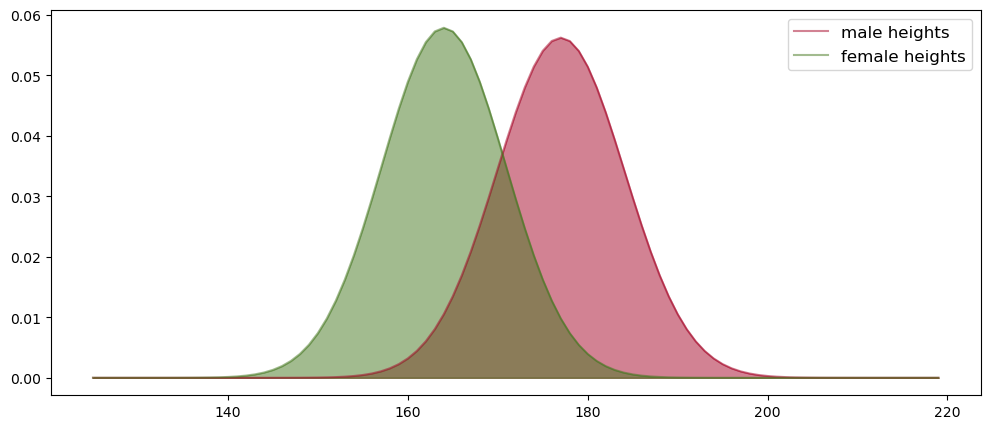

In [2]:
from scipy.stats import norm

plt.figure(figsize=(12, 5))

x = np.arange(125, 220)

y_male = norm.pdf(x, 177, 7.1)
y_female = norm.pdf(x, 164, 6.9)

plt.plot(x, y_male, color="#A60628", alpha=0.5, label="male heights")
plt.plot(x, y_female, color="#467821", alpha=0.5, label="female heights")

plt.fill_between(x, 0, y_male, color="#A60628", alpha=0.5)
plt.fill_between(x, 0, y_female, color="#467821", alpha=0.5)
plt.legend(fontsize=12);

### Difference in Heights Across Countries

* What does the effect size look like for differences in heights betwen females in Bolivia and in Bosnia and Herzegovina


$\hspace{0.6in}$ `Bolivian females height` $\sim\mathcal{N}(\mu=171.8, \sigma=6)$

$\hspace{0.6in}$ `Bosnian females heights` $\sim\mathcal{N}(\mu=142.2, \sigma=6)$


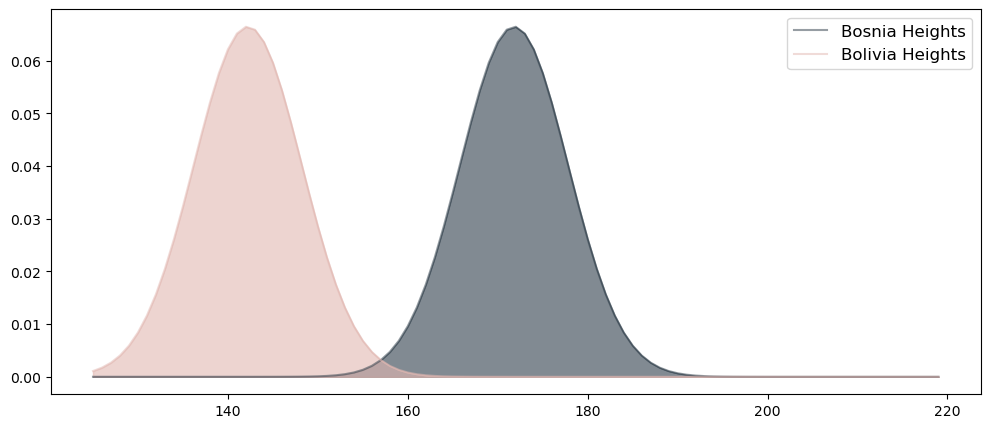

In [3]:
x = np.arange(125, 220)

y_bosnia = norm.pdf(x, 171.8, 6)
y_bolivia = norm.pdf(x, 142.2, 6)

plt.figure(figsize=(12, 5))

plt.plot(x, y_bosnia, color="#2E3D49",  alpha=0.5, label="Bosnia Heights")
plt.plot(x, y_bolivia, color="#E2B8B2", alpha=0.5, label="Bolivia Heights")

plt.fill_between(x, 0, y_bosnia, color="#2E3D49", alpha=0.6)
plt.fill_between(x, 0, y_bolivia, color="#E2B8B2", alpha=0.6)
plt.legend(fontsize=12);

### Intuition Underlying Effect Size

* The effect size describes the overlap between the two distributions we need to compare

  * Small effect size suggests that there is a more significant overlap 
    * It can be harder to detect differences between two populations

* Many approaches to intuitively quantify the overlap
  * Formal methods rely on similar intuition

* Ex. Using the misclassification rate
  * What is the rate of individuals in the first distribution that can be misclassified as originating in the second distribution and vice-versa
  

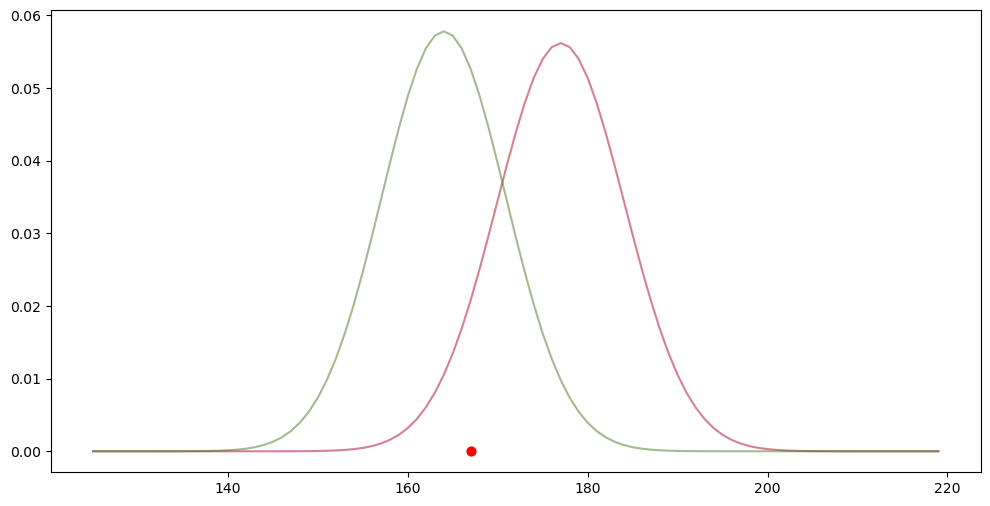

In [4]:
### Let's take a random height value, say 167cm.
from scipy.stats import norm

plt.figure(figsize=(12, 6))

x = np.arange(125, 220)
y_male = norm.pdf(x, 177, 7.1)
y_female = norm.pdf(x, 164, 6.9)

plt.plot(x, y_male, color="#A60628", alpha=0.5)
plt.plot(x, y_female, color="#467821", alpha=0.5)
plt.scatter(167, 0, color="Red", s=40);

### Intuition Underlying Effect Size -- Cont'd

* The probability density according to two diffenrent distributions

<img src="images/two_prob_density.png">

* This concept can be formalized to yield some standardized values
* E.g.: 
  1. Compute large number of values under different scenarios variying from complete separation to complete overlap
  2. Use the values in (1) to estimate the extent of the overlap in the current dataset

### Intuition Underlying Effect Size -- Cont'd

<img src="images/misclass_example.png">

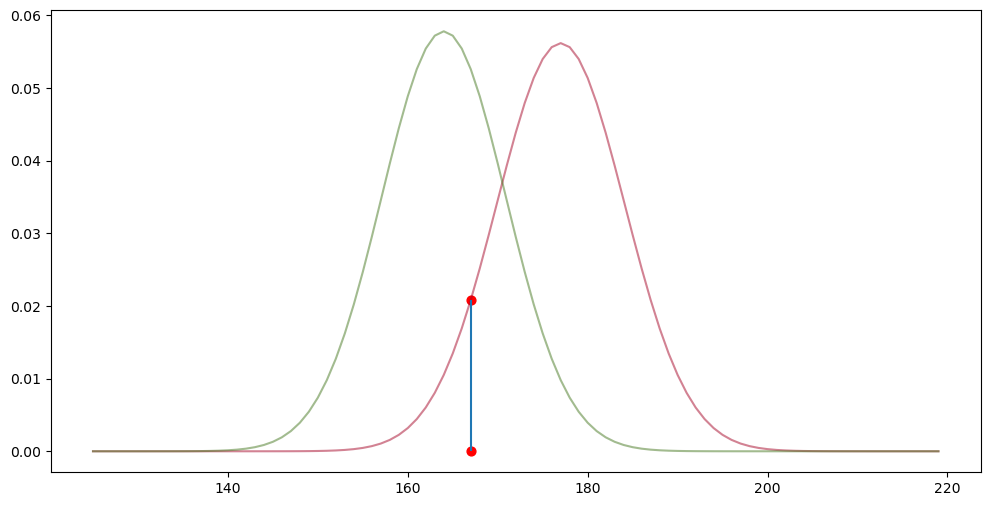

In [5]:
from scipy.stats import norm

plt.figure(figsize=(12, 6))

x = np.arange(125, 220)
y_male = norm.pdf(x, 177, 7.1)
y_female = norm.pdf(x, 164, 6.9)

plt.plot(x, y_male, color="#A60628", alpha=0.5)
plt.plot(x, y_female, color="#467821", alpha=0.5)
plt.scatter(167, 0, color="Red", s=40)

plt.vlines(167, 0, norm.pdf(167, 177, 7.1))
plt.scatter(167, norm.pdf(167, 177, 7.1), color="Red", s=40);

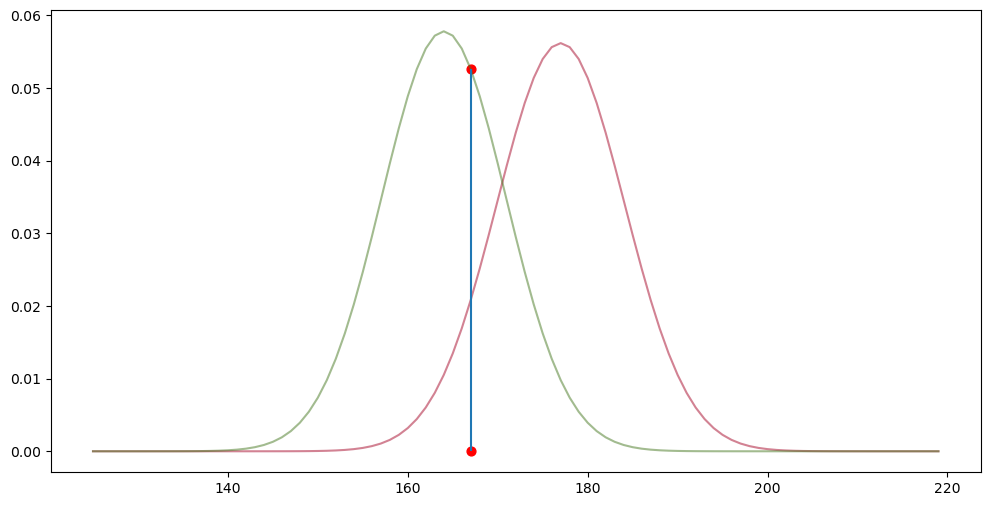

In [6]:
from scipy.stats import norm

plt.figure(figsize=(12, 6))

x = np.arange(125, 220)
y_male = norm.pdf(x, 177, 7.1)
y_female = norm.pdf(x, 164, 6.9)

plt.plot(x, y_male, color="#A60628", alpha=0.5)
plt.plot(x, y_female, color="#467821", alpha=0.5)
plt.scatter(167, 0, color="Red", s=40)

plt.vlines(167, 0, norm.pdf(167, 164, 6.9))
plt.scatter(167, norm.pdf(167, 164, 6.9), color="Red", s=40);

### Intuition Underlying Effect Size -- Cont'd

* Another intuitive formulation consists of using the probability of superiority

  * What is the probability that a randomly selected value on the right distribution is higher than a randomly selected value from the left distribution?

    * The smaller the overlap, the greater that probability is
    * The larger the overlap the more likely that values from the left distribution will be higher than values on right distribution
  
* We can sample directly from the theoretical distribution
<center><img src="images/misclassification_area.png" alt="Girl in a jacket" width="400"></center>

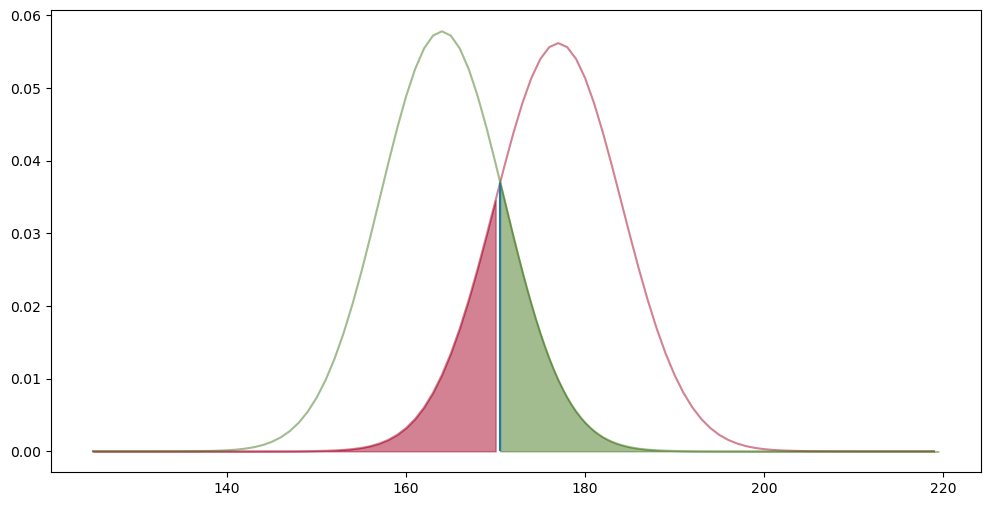

In [7]:
from scipy.stats import norm
plt.figure(figsize=(12, 6))

x = np.arange(125, 220)
y_male = norm.pdf(x, 177, 7.1)
y_female = norm.pdf(x, 164, 6.9)

intersect_mean = (177 + 164) / 2

plt.plot(x, y_male, color="#A60628", alpha=0.5)
plt.plot(x, y_female, color="#467821", alpha=0.5)
plt.vlines(intersect_mean, 0, norm.pdf(intersect_mean, 177, 7.1))

x_male_partial = np.arange(125, intersect_mean)
y_male_partial = norm.pdf(x_male_partial, 177, 7.1)
plt.fill_between(x_male_partial, 0, y_male_partial, color="#A60628", alpha=0.5)

x_female_partial = np.arange(intersect_mean, 220)
y_female_partial = norm.pdf(x_female_partial, 164, 6.9)
plt.fill_between(x_female_partial, 0, y_female_partial, color="#467821", alpha=0.5);

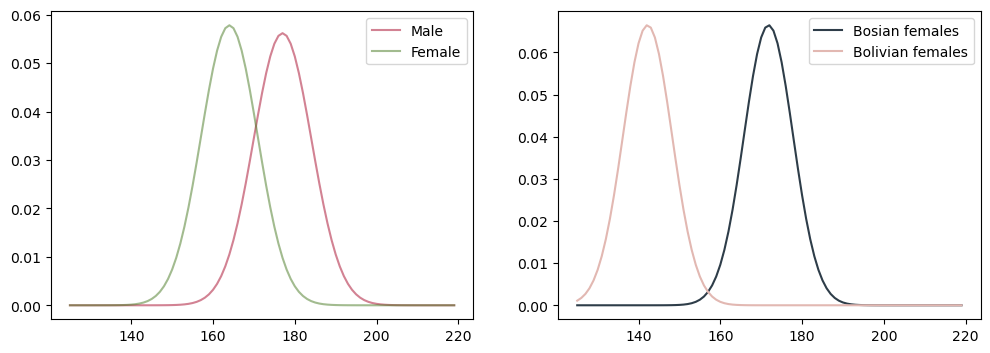

In [8]:
# Example
from scipy.stats import norm

plt.figure(figsize=(12, 4))
x = np.arange(125, 220)

plt.subplot(121)
y_male = norm.pdf(x, 177, 7.1)
y_female = norm.pdf(x, 164, 6.9)
plt.plot(x, y_male, color="#A60628", alpha=0.5, label="Male")
plt.plot(x, y_female, color="#467821", alpha=0.5, label="Female")
plt.legend()

plt.subplot(122)
y_bosnia = norm.pdf(x, 171.8, 6)
y_bolivia = norm.pdf(x, 142.2, 6)
plt.plot(x, y_bosnia, color="#2E3D49", label="Bosian females")
plt.plot(x, y_bolivia, color="#E2B8B2", label="Bolivian females")
plt.legend();

In [9]:
male_higher_female = [np.random.normal(177, 7.1) > np.random.normal(164, 6.9) for _ in range(100)]
male_higher_female[0:5]

[True, False, True, False, True]

In [10]:
male_higher_female = [np.random.normal(177, 7.1) > np.random.normal(164, 6.9) for _ in range(10000)]
sum(male_higher_female)/len(male_higher_female)

0.9024

In [11]:
bosnia_higher_bolivia = [np.random.normal(171.8, 6) > np.random.normal(142.2, 6) for _ in range(10000)]
sum(bosnia_higher_bolivia)/len(bosnia_higher_bolivia)

0.9999